In [1]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

/home/user/miniconda3/envs/churn/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load data

We load the preprocessed data

In [2]:
df = pd.read_csv('data/ecommerce.csv')
df.head()

,Unnamed: 0,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,1,0.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,2,1,0.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


Load model

In [3]:
model_path = "../mlartifacts/502767127835434973/models/m-ab86d1e357a54ad18a3dad4151ad4c0f/artifacts"
model = mlflow.sklearn.load_model(model_path)

Split data

In [4]:
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Encoding
le = LabelEncoder()
# Encode for cat_cols
for i in X_train.columns:
  if X_train[i].dtype == 'object':
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

In [6]:
X_test.describe()

,Unnamed: 0,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000
mean,2737.580817,10.087922,0.714920,1.636767,15.178508,1.764654,0.573712,2.919183,3.687389,2.055062,3.087034,1.158082,4.283304,0.276199,15.640320,1.680998,2.935531,4.697158,177.528135
std,1634.618208,8.308726,0.451653,0.909426,8.082965,0.993594,0.494756,0.720275,1.027602,1.122927,1.382902,0.671887,2.625791,0.447315,3.658212,1.861111,2.849768,3.718749,49.557299
min,8.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,1292.750000,3.000000,0.000000,1.000000,9.000000,1.000000,0.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.282500
50%,2693.500000,9.000000,1.000000,1.000000,13.000000,2.000000,1.000000,3.000000,4.000000,2.000000,3.000000,1.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,161.910000
75%,4222.750000,15.000000,1.000000,3.000000,19.000000,2.000000,1.000000,3.000000,4.000000,3.000000,4.000000,2.000000,6.000000,1.000000,18.000000,2.000000,3.000000,8.000000,200.772500
max,5623.000000,31.000000,1.000000,3.000000,36.000000,4.000000,1.000000,4.000000,6.000000,4.000000,5.000000,2.000000,21.000000,1.000000,26.000000,16.000000,16.000000,31.000000,324.730000


In [15]:
print(model.get_booster().trees_to_dataframe().shape[0])

6592


In [14]:
print(model.get_xgb_params())

{}


In [21]:
X_small = X_test.iloc[:10]

In [34]:
explainer = shap.Explainer(model, X_small)
shap_values = explainer(X_small)

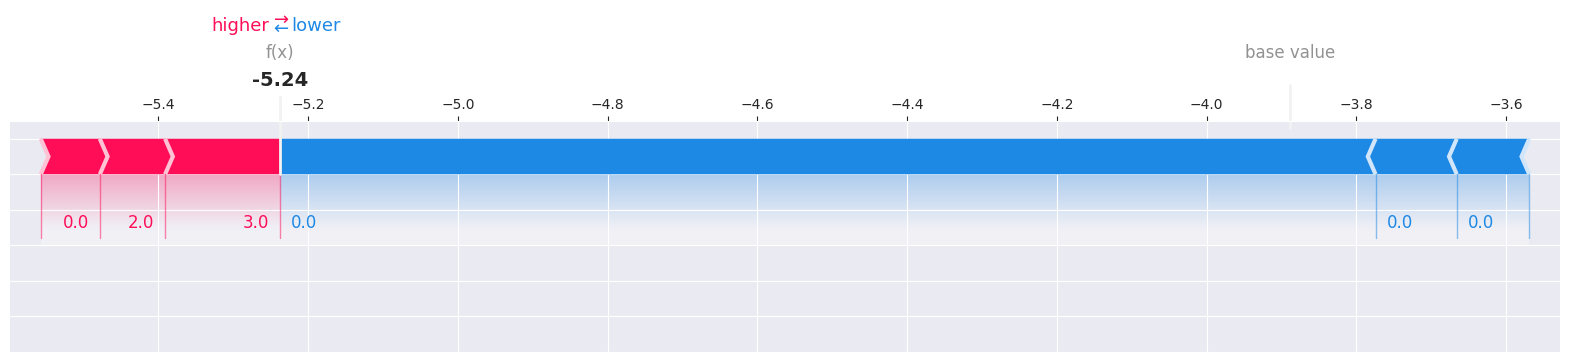

In [37]:
shap.initjs()

# INTERACTIVE JS BUT ONLY FOR JUPYTER NOTEBOOK OR JUPYTERLAB
"""explanation = shap.Explanation(
    values=shap_values[0],
    base_values=explainer.expected_value,
    data=X_small.iloc[0,:],
    feature_names=X_small.columns
)

shap.force_plot(explanation)"""

# IF YOU'RE NOT USING JUPYTER NOTEBOOK? DISPLAY STATIC
shap.force_plot(
    explainer.expected_value,
    shap_values[0].values if hasattr(shap_values[0], 'values') else shap_values[0],
    X_small.iloc[0, :].values,
    matplotlib=True
)

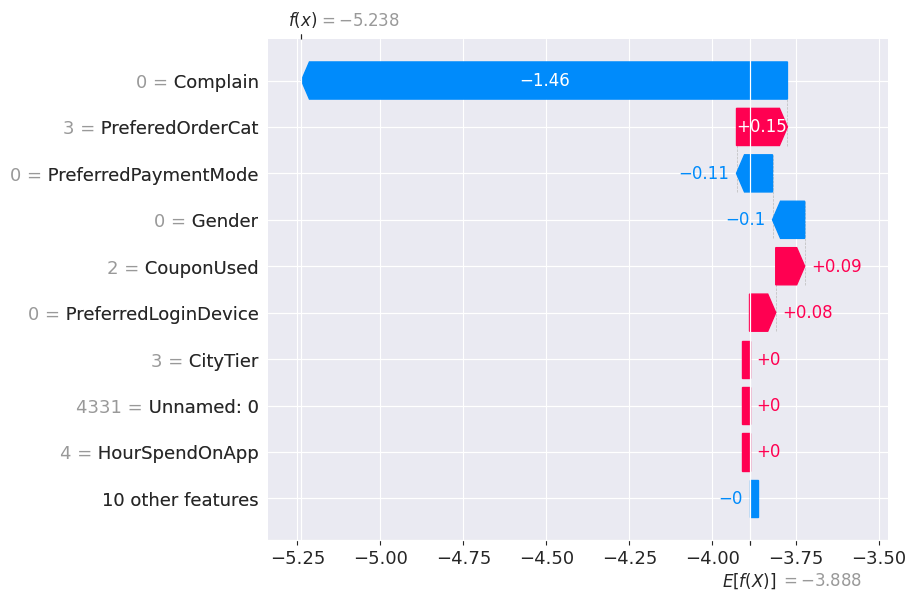

In [50]:
shap.plots.waterfall(shap_values[0])

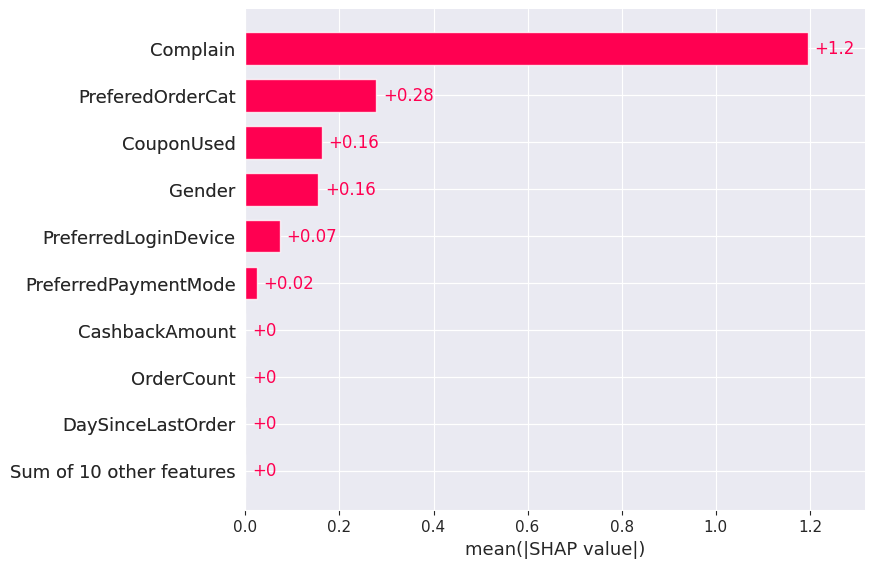

In [51]:
shap.plots.bar(shap_values)

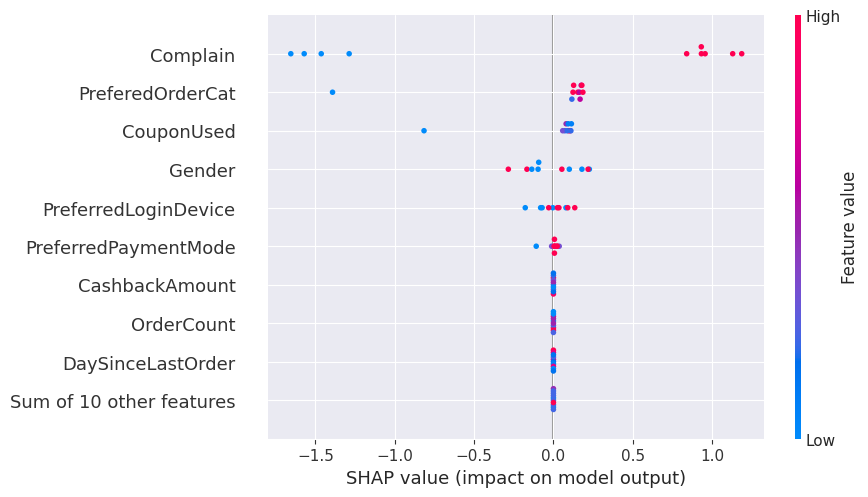

In [49]:
shap.plots.beeswarm(shap_values)

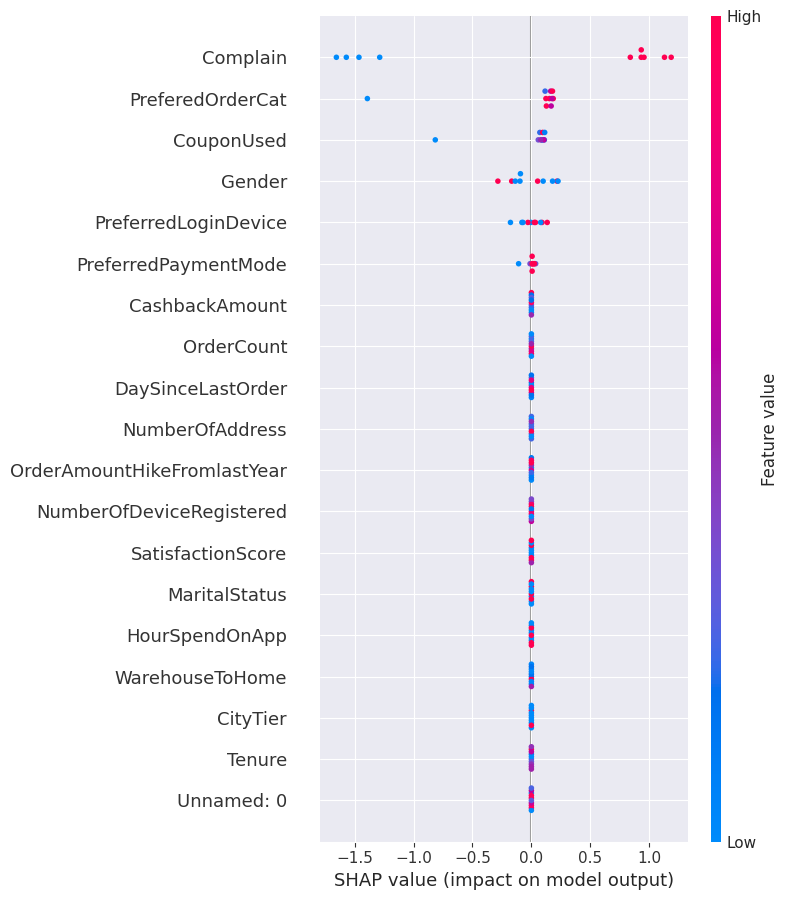

In [55]:
shap.summary_plot(shap_values, X_small)